# Task:

Derive similarity score between two sentences applying three different techniques. 
- Reference Article: [A beginner’s guide to measuring sentence similarity](https://medium.com/@igniobydigitate/a-beginners-guide-to-measuring-sentence-similarity-f3c78b9da0bc)

## Sentence Embedding

Sentence embedding represents a sentence as a vector of numbers. This numerical representation of a sentence is called sentence embedding. In a word embedding corresponds to a particular feature or aspect of the word. A sentence embedding is based on a similar concept where the dimensions collectively capture different aspects of the words used in the sentence, the grammatical structure of the sentence, and maybe some more underlying information.

There are various ways in which a sentence embedding can be created. Once we have each sentence represented as a vector of numbers, then the problem of finding sentence similarity translates to the problem of finding similarity between these numeric vectors.

In this notebook I will discuss a couple of statistical techniques to create numeric representations of sentences and briefly explore an idea of how one can utilize word embeddings for the same task. I will also discuss how similarity between sentence embeddings can be computed.

## Sample sentences

We take sentences form two unrelated movies to work with. This is done with the goal to demonstrate how sentences turn out to be either similar or dissimilar across these movies. I expect sentences from spiderman to show higher similarity with other senteces from the same movie and a lower similarity score from the sentences from the movie Godfather.

In [249]:
import numpy as np
import pandas as pd

In [250]:
# Sample sentences from Spider-Man
spiderman_sentences = [
    "With great power comes great responsibility.",
    "I missed the part where that's my problem.",
    "You're not Superman, you know.",
    "Remember, with great power comes great responsibility.",
    "I'm just Peter Parker. I'm Spider-Man no more.",
    "Whatever life holds in store for me, I will never forget these words.",
    "The truth is, I am Spider-Man.",
    "This is my gift, my curse. Who am I? I'm Spider-Man.",
    "Sometimes, to do what's right, we have to be steady and give up the things we want the most.",
    "I want to tell you the truth... here it is: I'm Spider-Man."
]

# Sample sentences from The Godfather
godfather_sentences = [
    "I'm gonna make him an offer he can't refuse.",
    "Revenge is a dish best served cold.",
    "A man who doesn't spend time with his family can never be a real man.",
    "Leave the gun. Take the cannoli.",
    "The lawyer with the briefcase can steal more money than the man with the gun.",
    "It's not personal, Sonny. It's strictly business.",
    "Women and children can be careless, but not men.",
    "Power wears out those who do not have it.",
    "Friendship is everything. Friendship is more than talent. It is more than the government. It is almost the equal of family.",
    "Great men are not born great, they grow great."
]

all_sentences = spiderman_sentences + godfather_sentences

## Bag of words

The basic idea is to find out which words are present in a sentence and assess the importance of a word based on how many times it occurs in a sentence.

#### Creating a dictionary and removing stop words

Words such as is, are, a, an, the etc do not add much value in terms of providing context to a sentence. These are called stop words. So before we go ahead and count the frequency of words, we want to remove these stop words from the sentences.

In [251]:
# Define a list of stop words
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
    'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

#### Removing punctuations
Before we go ahead and remove stop words, we first want to remove punctuations from the words so that they also get flagged as stop words. And even if not we don't want to consider men and men. as different words. So we remove punctuations.

Explanation of code below:

- str.maketrans('', '', string.punctuation) creates a translation table that maps each character in string.punctuation to None.
- str.maketrans is a static method that returns a translation table usable for str.translate.
- The first two arguments are empty strings ('') because we are not replacing any characters, only removing.
- The third argument is string.punctuation, which contains all punctuation characters.
- word.translate(...) uses the translation table to remove all punctuation characters from the word.

In [252]:
import string
def remove_punctuation(word):
    return word.translate(str.maketrans('', '', string.punctuation))

In [253]:
# Sample sentence
sentence = "This is an example sentence showing the removal of stop words."

def remove_stop_words(sentence):
    
    # Tokenize the sentence
    words = sentence.lower().split()
    
    # Remove stop words
    filtered_words = [remove_punctuation(word) for word in words if word not in stop_words]
    
    # Join the words back into a sentence
    filtered_sentence = ' '.join(filtered_words)

    return filtered_sentence

print("Original sentence:", sentence)
print("Filtered sentence:", remove_stop_words(sentence))

Original sentence: This is an example sentence showing the removal of stop words.
Filtered sentence: example sentence showing removal stop words


In [254]:
# Removing stopwords from all sentences in our database

spiderman_stop_removed = []
godfather_stop_removed = []

for sentence in spiderman_sentences:
    spiderman_stop_removed.append(remove_stop_words(sentence).split())

for sentence in godfather_sentences:
    godfather_stop_removed.append(remove_stop_words(sentence).split())

print("spiderman_original:")
print(spiderman_sentences[0])
print(spiderman_sentences[1])
print(spiderman_sentences[2])
print()
print("spiderman_stop_removed:")
print(spiderman_stop_removed[0])
print(spiderman_stop_removed[1])
print(spiderman_stop_removed[2])


spiderman_original:
With great power comes great responsibility.
I missed the part where that's my problem.
You're not Superman, you know.

spiderman_stop_removed:
['great', 'power', 'comes', 'great', 'responsibility']
['missed', 'part', 'thats', 'problem']
['youre', 'superman', 'know']


#### Creating a dictionary of words in all sentences

Now that we have removed the stop words, let's create a dictionary of all non stop words and create a dataset where for each sentence we have a row of frequency of each word

In [255]:
# Creating a set of all unique words

# Let's combine all arrays into one
all_sentences_stop_removed = spiderman_stop_removed+ godfather_stop_removed

# get unique words from all sentences and put it into a set
unique_words = set()
for sentence in all_sentences_stop_removed:
    for word in sentence:
        unique_words.add(word)

print(f"Total unique words : {len(unique_words)}")

Total unique words : 82


#### Creating the dataframe that shows the word count of each sentence

In [256]:
from collections import Counter

In [257]:
# Create a frequency matrix
frequency_matrix = []

for sentence in all_sentences_stop_removed:
    word_count = Counter(sentence)
    frequency_matrix.append([word_count.get(word, 0) for word in unique_words])

# Create a DataFrame
df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
print(df)

    remember  equal  know  superman  man  lawyer  money  real  cannoli  im  \
0          0      0     0         0    0       0      0     0        0   0   
1          0      0     0         0    0       0      0     0        0   0   
2          0      0     1         1    0       0      0     0        0   0   
3          1      0     0         0    0       0      0     0        0   0   
4          0      0     0         0    0       0      0     0        0   2   
5          0      0     0         0    0       0      0     0        0   0   
6          0      0     0         0    0       0      0     0        0   0   
7          0      0     0         0    0       0      0     0        0   1   
8          0      0     0         0    0       0      0     0        0   0   
9          0      0     0         0    0       0      0     0        0   1   
10         0      0     0         0    0       0      0     0        0   1   
11         0      0     0         0    0       0      0     0   

#### Using cosine similarity to calculate how similar the sentences are

Consider that two n-dimensional arrays are plotted as two vectors in an n-dimensional space. Cosine similarity measures the angle between these two vectors and returns a value between -1 and 1. Mathematically, given two vectors A and B, cosine similarity is calculated as follows:

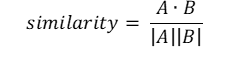

where,


- A.B = Dot product between two vectors. It is calculated by adding the product of corresponding vector values.


- |A|, |B| = Magnitude of a vector. It is the square root of the sum of squares of all the vector values.

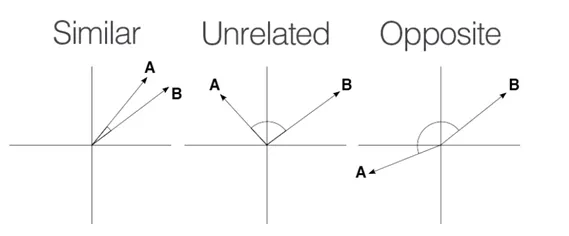

#### The cosine similarity function

In [258]:
def consine(vec1, vec2):
    # Compute the dot product
    dot_product = np.dot(vec1, vec2)
    
    # Compute the Euclidean norm (magnitude) of each vector
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    # Compute the cosine similarity
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0
    else:
        return dot_product / (norm_vec1 * norm_vec2)

In [259]:
# Testing this between two sentences within the spiderman movie
print(all_sentences)
print(len(all_sentences))

['With great power comes great responsibility.', "I missed the part where that's my problem.", "You're not Superman, you know.", 'Remember, with great power comes great responsibility.', "I'm just Peter Parker. I'm Spider-Man no more.", 'Whatever life holds in store for me, I will never forget these words.', 'The truth is, I am Spider-Man.', "This is my gift, my curse. Who am I? I'm Spider-Man.", "Sometimes, to do what's right, we have to be steady and give up the things we want the most.", "I want to tell you the truth... here it is: I'm Spider-Man.", "I'm gonna make him an offer he can't refuse.", 'Revenge is a dish best served cold.', "A man who doesn't spend time with his family can never be a real man.", 'Leave the gun. Take the cannoli.', 'The lawyer with the briefcase can steal more money than the man with the gun.', "It's not personal, Sonny. It's strictly business.", 'Women and children can be careless, but not men.', 'Power wears out those who do not have it.', 'Friendship is

In [260]:
# Let's try the first and the 4th statement
all_sentences[0]

'With great power comes great responsibility.'

In [261]:
all_sentences[3]

'Remember, with great power comes great responsibility.'

In [262]:
consine(df.loc[0], df.loc[3])

0.9354143466934852

In [263]:
# Let's pick a sentence that does not have power or responsibility in it
all_sentences[18]

'Friendship is everything. Friendship is more than talent. It is more than the government. It is almost the equal of family.'

In [264]:
consine(df.loc[0], df.loc[18])

0.0

This is not similar at at all!

Let's write a function that given two sentences does this process end to end

In [265]:
def findSimilarityBagOfWords(sentence1, sentence2):
    # combining sentences to an array
    sentences = [sentence1, sentence2]
    stop_removed = []

    # removing stop words and punctuation from the words
    for sentence in sentences:
        stop_removed.append(remove_stop_words(sentence).split())

    # getting list of unique words
    unique_words = set()
    for sentence in stop_removed:
        for word in sentence:
            unique_words.add(word)

    # Create a frequency matrix
    frequency_matrix = []
    
    for sentence in stop_removed:
        word_count = Counter(sentence)
        frequency_matrix.append([word_count.get(word, 0) for word in unique_words])
    
    # Create a DataFrame
    df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
    print(f"Similarity score: {consine(df.loc[0], df.loc[1])}")
    return df

In [266]:
findSimilarityBagOfWords("Who let the dogs out!", "Who let the cats out!")

Similarity score: 0.6666666666666667


,out,dogs,let,cats
0,1,1,1,0
1,1,0,1,1


In [267]:
findSimilarityBagOfWords("Mamma mia , here we go again ", "My my! how can I resist you ?")

Similarity score: 0.0


,mia,resist,mamma,go,my
0,1,0,1,1,0
1,0,1,0,0,1


In [268]:
paragraph1 = "In the bustling city of Metropolis, the skyline is dominated by towering skyscrapers that reach for the heavens. The streets below are a hive of activity, with people from all walks of life hurrying to and fro. The air is filled with the sounds of honking cars, distant sirens, and the constant chatter of passersby. Amidst the urban chaos, pockets of tranquility can be found in the form of small parks and green spaces, offering a brief respite from the hustle and bustle. At night, the city transforms into a sea of lights, with neon signs and street lamps illuminating the dark, creating a vibrant and lively atmosphere that never seems to sleep."
paragraph2 = "In the tranquil town of Riverview, life moves at a leisurely pace. The town is known for its picturesque scenery, with rolling hills and a serene river that winds its way through the heart of the community. The streets are lined with charming houses, each with well-tended gardens bursting with colorful flowers. The sound of birds singing fills the air, and the occasional laughter of children playing can be heard in the distance. Riverview's town square is a hub of local activity, where residents gather for farmers' markets, craft fairs, and community events. As the sun sets, the town is bathed in a golden glow, and the sky is painted with hues of pink and orange, bringing a peaceful end to another day in this idyllic setting."

print(paragraph1)
print()
print(paragraph2)

In the bustling city of Metropolis, the skyline is dominated by towering skyscrapers that reach for the heavens. The streets below are a hive of activity, with people from all walks of life hurrying to and fro. The air is filled with the sounds of honking cars, distant sirens, and the constant chatter of passersby. Amidst the urban chaos, pockets of tranquility can be found in the form of small parks and green spaces, offering a brief respite from the hustle and bustle. At night, the city transforms into a sea of lights, with neon signs and street lamps illuminating the dark, creating a vibrant and lively atmosphere that never seems to sleep.

In the tranquil town of Riverview, life moves at a leisurely pace. The town is known for its picturesque scenery, with rolling hills and a serene river that winds its way through the heart of the community. The streets are lined with charming houses, each with well-tended gardens bursting with colorful flowers. The sound of birds singing fills th

In [269]:
findSimilarityBagOfWords(paragraph1, paragraph2)

Similarity score: 0.05466133744605251


,streets,markets,hustle,occasional,bringing,neon,metropolis,hub,pink,orange,...,distance,serene,bathed,community,form,scenery,activity,hues,residents,day
0,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,0,1,1,0,0,1,1,1,...,1,1,1,2,0,1,1,1,1,1


## TF-IDF

#### Explanation of TF-IDF 

Term frequency - Inverse Document Frequency

The bag of words approach gives equal weight to all words. However, a more sophisticated approach is the TF-IDF approach. TF-IDF stands for Term Frequency — Inverse Document Frequency. This approach is based on the rationale that the most common words are usually the least significant ones. While stop words are removed in the bag of words approach, **TF-IDF provides a more sophisticated approach to automatically give less weight to frequent words that appear in the whole corpus.**

Let's break it down further: 

**Term Frequency** : How frequent a term appears within the given document. Can be within the same sentence, paragraph or whole text.

**Inverse Document Frequency** : This is representative of how rare this word is across all the documents in the corpus. 

IDF is calculated by taking the logarithm of the ratio of the total number of documents and the number of documents containing the word (document frequency). The more frequently the word appears across the corpus, the lower its inverse document frequency making it less important. Similarly, the rarer the word in the corpus, the higher its inverse document frequency. 

Mathematically,

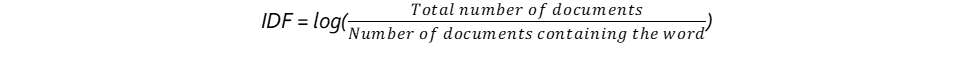

The TF-IDF value for a word can be calculated as follows:

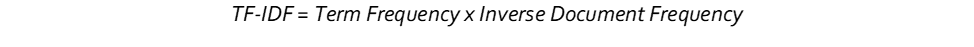

#### What makes TF-IDF better than Bag of words ?

Let's find out by trying it out. 

**Step 1**: Create a corpus of words, that we have already done for the bag of words. 

**Step 2**: Create a dicrionary of words from the corpus. Already done for bag of words `unique_words`

**Step 3**: Creating the word embeddings. This is where the difference comes in between bag of words and TF-IDF. Instead of just sticking to the term frequency, we also calculate the Inverse Document Frequency and multiple it with the TF to get the TF-IDF value for the word in the sentence.

In [270]:
import math

# Let's go through all sentences and words and create a counter of how many times a word has appeared across documents
idf = {}

# We pick the array of all sentences that have stop words removed [][]
for words_arr in all_sentences_stop_removed:
    unique_words_in_sentence = set(words_arr)

    # for each of these unique words, increment the value in the idf array
    for word in unique_words_in_sentence:
        if word in idf :
            idf[word] =  idf[word] + 1
        else:
            idf[word] = 1
            
number_of_documents = len(all_sentences_stop_removed)



# Create a frequency matrix
# Each row corresponds to each sentence
# Each colunm corresponds to one unique word in the corpus of unique words
frequency_matrix = []

for sentence in all_sentences_stop_removed:
    word_count = Counter(sentence)
    frequency_matrix.append([word_count.get(word, 0) * (math.log(number_of_documents / idf[word]) ) for word in unique_words])

# Create a DataFrame
df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
print(df)

    remember     equal      know  superman       man    lawyer     money  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  2.995732  2.995732  0.000000  0.000000  0.000000   
3   2.995732  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

We notice that the text embeddings are completely different in this case. However the calculation for the similarity still remains the same. We can use cosine similarity from the values present in this dataframe. 

In [271]:
print(all_sentences[0])
print(all_sentences[3])
consine(df.loc[0], df.loc[3])

With great power comes great responsibility.
Remember, with great power comes great responsibility.


0.8724395002378096

Initially using bag of words, we got 0.9354143466934852

Now with TF-IDF we get 0.8724395002378096

Let's write it into it's own function so that we can compare different methods in parallel.

In [272]:
def findSimilarityTfIdf(sentence1, sentence2):
    # combining sentences to an array
    sentences = [sentence1, sentence2]
    stop_removed = []

    # removing stop words and punctuation from the words
    for sentence in sentences:
        stop_removed.append(remove_stop_words(sentence).split())

    # getting list of unique words
    unique_words = set()
    for sentence in stop_removed:
        for word in sentence:
            unique_words.add(word)

    # Let's go through all sentences and words and create a counter of how many times a word has appeared across documents
    idf = {}
    # We pick the array of all sentences that have stop words removed [][]
    for words_arr in stop_removed:
        unique_words_in_sentence = set(words_arr)
    
        # for each of these unique words, increment the value in the idf dictionary
        for word in unique_words_in_sentence:
            if word in idf :
                idf[word] =  idf[word] + 1
            else:
                idf[word] = 1

    number_of_documents = len(stop_removed) 

    # Create a frequency matrix
    # Each row corresponds to each sentence
    # Each colunm corresponds to one unique word in the corpus of unique words
    frequency_matrix = []
    
    for sentence in stop_removed:
        sentence_word_counter = Counter(sentence)
        frequency_matrix.append([sentence_word_counter.get(word, 0) * (math.log(number_of_documents / idf[word]) ) for word in unique_words])

    # Create a DataFrame
    df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
    print(f"Similarity score: {consine(df.loc[0], df.loc[1])}")
    return df

In [281]:
def compareMethods(sentence1, sentence2, showDf):
    print(f"Sentence 1: {sentence1}")
    print()
    print(f"Sentence 2: {sentence2}")
    print()
    print("Bag of words")
    bowDf = findSimilarityBagOfWords(sentence1, sentence2)
    if(showDf):
        print(bowDf)
    print()
    print("TF-IDF")
    tfIdfDf = findSimilarityTfIdf(sentence1, sentence2)
    if(showDf):
        print(tfIdfDf)

In [279]:
compareMethods("Who let the dogs out!", "Who let the cats out!", True)

Sentence 1: Who let the dogs out!
Sentence 2: Who let the cats out!

Bag of words
Similarity score: 0.6666666666666667
   out  dogs  let  cats
0    1     1    1     0
1    1     0    1     1

TF-IDF
Similarity score: 0.0
   out      dogs  let      cats
0  0.0  0.693147  0.0  0.000000
1  0.0  0.000000  0.0  0.693147


## Insights

We took two sentences 
- Who let the dogs out!
- Who let the cats out!

And we have a look at the word embeddings that were created using the two methods: 

TF-IDF:
```
   out      dogs  let      cats
0  0.0  0.693147  0.0  0.000000
1  0.0  0.000000  0.0  0.693147
```

Bag of words:
```
   out  dogs  let  cats
0    1     1    1     0
1    1     0    1     1
```

We notice that while TF-IDF heavily penalizes the common words such as out and let in the corpus, those words are given the same priority as the rare words when we use the bag of words method. This way we can get to understand how TF IDF works better than Bag of words.

## Semantic understanding

While the above two methods are able to statistically capture the similarities amongst the words, they fail at instances where we need to capture the semantic understanding of the sentences and then find similar ones. 

For example let's look at the following sentences where we praise two leaders of the world. 

Barack Obama: "Barack Obama's eloquence and unwavering commitment to social justice and equality have inspired millions around the globe, making him a beacon of hope and progressive change."

Angela Merkel: "Angela Merkel's steadfast leadership and pragmatic approach to governance have earned her immense respect, as she navigated Germany through numerous crises with remarkable poise and integrity."

In [282]:
sentence1 = "Barack Obama's eloquence and unwavering commitment to social justice and equality have inspired millions around the globe, making him a beacon of hope and progressive change."
sentence2 = "Angela Merkel's steadfast leadership and pragmatic approach to governance have earned her immense respect, as she navigated Germany through numerous crises with remarkable poise and integrity."
compareMethods(sentence1, sentence2, showDf=False)

Sentence 1: Barack Obama's eloquence and unwavering commitment to social justice and equality have inspired millions around the globe, making him a beacon of hope and progressive change.

Sentence 2: Angela Merkel's steadfast leadership and pragmatic approach to governance have earned her immense respect, as she navigated Germany through numerous crises with remarkable poise and integrity.

Bag of words
Similarity score: 0.0

TF-IDF
Similarity score: 0.0


> This is crazy !! Both these sentences are about world leaders and in praise of them. This shows how Bag of words and Tf IDf are pretty rudimentary techniques objectively.

## Other Traditional Methods for Sentence Similarity

Before diving into neural network-based methods for calculating sentence similarity, it is beneficial to explore several traditional techniques. These methods are straightforward to implement and provide a solid foundation for understanding text similarity. Here are some notable traditional methods:

### 1. Jaccard Similarity
Jaccard similarity measures the similarity between two sets by comparing the size of their intersection to the size of their union. It is useful for comparing text based on the presence or absence of terms.

**Example:**
```python
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)
```

### 2. Levenshtein Distance (Edit Distance)
Levenshtein distance calculates the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into another. It measures the similarity between two strings.

**Example:**
```python
import Levenshtein

levenshtein_distance = Levenshtein.distance(sentence1, sentence2)
```

### 3. Overlap Coefficient
The overlap coefficient measures the overlap between two sets relative to the smaller set. It is particularly useful when comparing sets of different sizes.

**Example:**
```python
def overlap_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return len(intersection) / min(len(set1), len(set2))
```

### 4. Dice Coefficient
The Dice coefficient measures the similarity between two sets based on the ratio of twice the size of the intersection to the sum of the sizes of the sets.

**Example:**
```python
def dice_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return 2 * len(intersection) / (len(set1) + len(set2))
```

### Summary
These traditional methods offer various ways to measure the similarity between sentences without requiring complex model training. Each method has its strengths and weaknesses, depending on the specific use case and the nature of the text data. Exploring these techniques provides a solid foundation before moving on to more advanced, neural network-based methods for calculating sentence similarity.

## Applying a third technique for assignment completion

In [9]:
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

In [10]:
def overlap_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return len(intersection) / min(len(set1), len(set2))

In [11]:
def dice_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return 2 * len(intersection) / (len(set1) + len(set2))

In [12]:
# Comparing all traditional methods
def compare_other_traditional_methods(sentence1, sentence2):
    setSentence1 = set(sentence1.split())
    setSentence2 = set(sentence2.split())

    print(f"Jaccard similarity for sentence 1 and sentence 2 : {jaccard_similarity(setSentence1, setSentence2)}")
    print()
    print(f"Overlap Coefficient for sentence 1 and sentence 2 : {overlap_coefficient(setSentence1, setSentence2)}")
    print()
    print(f"Dice Coefficient for sentence 1 and sentence 2 : {dice_coefficient(setSentence1, setSentence2)}")

In [13]:
# Example 1:
sentence1 = "the cat is on the mat"
sentence2 = "the mat is under the cat"
# Example 2
sentence3 = "The quick brown fox jumped over the lazy dog"
sentence4 = "The fast brown fox jumped over the sleepy dog"

In [14]:
compare_other_traditional_methods(sentence1, sentence2)

Jaccard similarity for sentence 1 and sentence 2 : 0.6666666666666666

Overlap Coefficient for sentence 1 and sentence 2 : 0.8

Dice Coefficient for sentence 1 and sentence 2 : 0.8


# Further reading

We got a good gist of how similarity search works and how it can be implemented using traditional techniques. Next we will refer to the following resources and implement advanced techniques that help us to capture the theme, context and semantic meaning of the sentences while embedding them. These form the basis of applications like search engines, language translation and chatbots.

## Reference Links:
- [Word embeddings: Helping computers understand language semantics](https://medium.com/@igniobydigitate/word-embeddings-helping-computers-understand-language-semantics-dd3456b1f700)
- [word_vectors_game_of_thrones-LIVE- GitHub Notebook](https://github.com/llSourcell/word_vectors_game_of_thrones-LIVE/blob/master/Thrones2Vec.ipynb)